In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_obesity = pd.read_csv("C:\\Users\\Igor\\Documents\\GitHub\\Tech_Challenge_Fase_4_Data_Analitycs\\data\\Obesity.csv")

df_obesity.info()
df_obesity.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [45]:

# Efetuando transformações para facilittar a analise
novos_nomes = {
    'Gender': 'Gênero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history': 'Histórico_Familiar_Obesidade',
    'FAVC': 'Frequencia_Consumo_Alimento_Calorico',
    'FCVC': 'Frequencia_Consumo_Vegetais',
    'NCP': 'Numero_Refeicoes_Principais',
    'CAEC': 'Consumo_Alimento_Entre_Refeicoes',
    'SMOKE': 'Fumante',
    'CH2O': 'Consumo_Agua',
    'SCC': 'Monitoramento_Calorico',
    'FAF': 'Frequencia_Atividade_Fisica',
    'TUE': 'Tempo_Uso_Tecnologia',
    'CALC': 'Consumo_Alcool',
    'MTRANS': 'Meio_Transporte',
    'Obesity': 'Status_Obesidade'  
}

# Renomeia as colunas no DataFrame
df_obesity = df_obesity.rename(columns=novos_nomes)

#  Alterando para inteiro

df_obesity['Idade'] = df_obesity['Idade'].astype(int)

# Arredondando valores float para 2 casas decimais

colunas_float_arredondar = [
    'Frequencia_Consumo_Vegetais',
    'Numero_Refeicoes_Principais',
    'Consumo_Agua',
    'Frequencia_Atividade_Fisica',
    'Tempo_Uso_Tecnologia'
]

for coluna in colunas_float_arredondar:
    df_obesity[coluna] = df_obesity[coluna].round(2)


# alterando para binario, assim facilitando a analise da ML

mapeamento_binario = {'yes': 1, 'no': 0}

colunas_binarias = [
    'Histórico_Familiar_Obesidade',
    'Frequencia_Consumo_Alimento_Calorico',
    'Fumante',
    'Monitoramento_Calorico'
]

for coluna in colunas_binarias:
    df_obesity[coluna] = df_obesity[coluna].str.lower().map(mapeamento_binario).astype(int)




In [46]:
#Verificamos se a valores nulos para tratar
df_obesity.isna().sum()

Gênero                                  0
Idade                                   0
Altura                                  0
Peso                                    0
Histórico_Familiar_Obesidade            0
Frequencia_Consumo_Alimento_Calorico    0
Frequencia_Consumo_Vegetais             0
Numero_Refeicoes_Principais             0
Consumo_Alimento_Entre_Refeicoes        0
Fumante                                 0
Consumo_Agua                            0
Monitoramento_Calorico                  0
Frequencia_Atividade_Fisica             0
Tempo_Uso_Tecnologia                    0
Consumo_Alcool                          0
Meio_Transporte                         0
Status_Obesidade                        0
dtype: int64

In [47]:
df_obesity['IMC'] = df_obesity['Peso'] / (df_obesity['Altura'] ** 2)


### GRAFICOS DE INSIGTHS

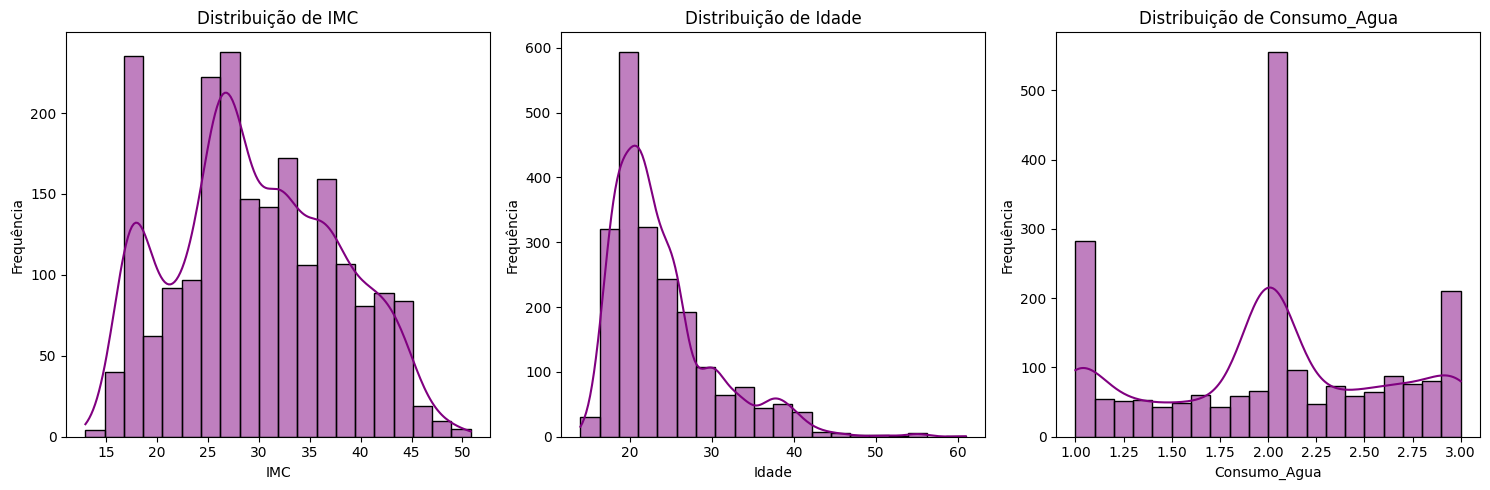

In [ ]:
# (IMC, Idade, Consumo de Água)
colunas_hist = ['IMC', 'Idade', 'Consumo_Agua']
plt.figure(figsize=(15, 5))
for i, col in enumerate(colunas_hist):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_obesity[col], kde=True, bins=20, color='purple')
    plt.title(f'Distribuição de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
plt.tight_layout()
plt.show() 

C:\Users\Igor\AppData\Local\Temp\ipykernel_18544\1568284418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_obesity, x='Status_Obesidade', order=order, palette='purple')


ValueError: 'purple' is not a valid palette name

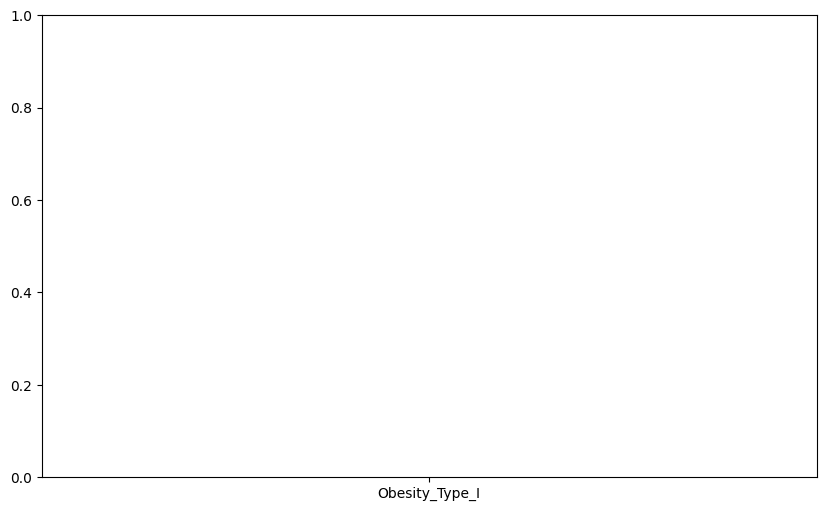

In [ ]:
# B. Contagens da Variável Alvo (Status_Obesidade) - GRÁFICO DE BARRAS VERTICAL ORDENADO
plt.figure(figsize=(10, 6))
# A ordem já está correta (do maior para o menor)
order = df_obesity['Status_Obesidade'].value_counts().index
# Altera 'y' para 'x' para criar um gráfico de barras vertical
sns.countplot(data=df_obesity, x='Status_Obesidade', order=order, palette='viridis')
plt.title('Contagem da Variável Alvo (Status de Obesidade)', fontsize=14)
plt.xlabel('Status de Obesidade', fontsize=12) # O eixo X agora é a variável
plt.ylabel('Contagem', fontsize=12)         # O eixo Y agora é a contagem
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()
plt.show() # Exibe o gráfico

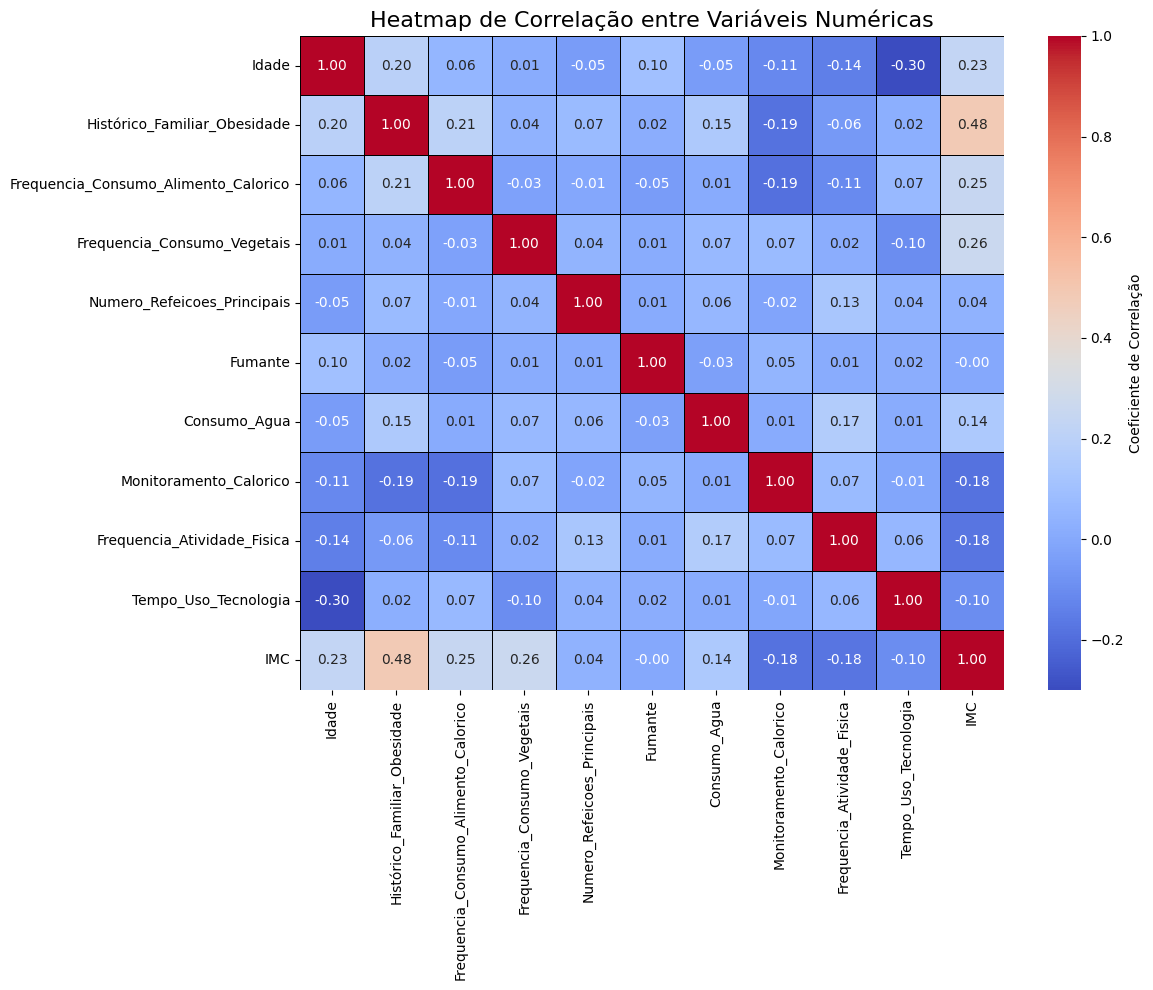

In [53]:

# C. Heatmap de Correlação Numérica
# Seleciona apenas colunas numéricas e calcula a matriz de correlação
colunas_numericas = df_obesity.select_dtypes(include=np.number).columns
# Removendo 'Altura' e 'Peso' da visualização, pois o IMC já as representa
df_corr = df_obesity[colunas_numericas].drop(columns=['Altura', 'Peso'], errors='ignore')
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black', cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show() # Exibe o gráfico



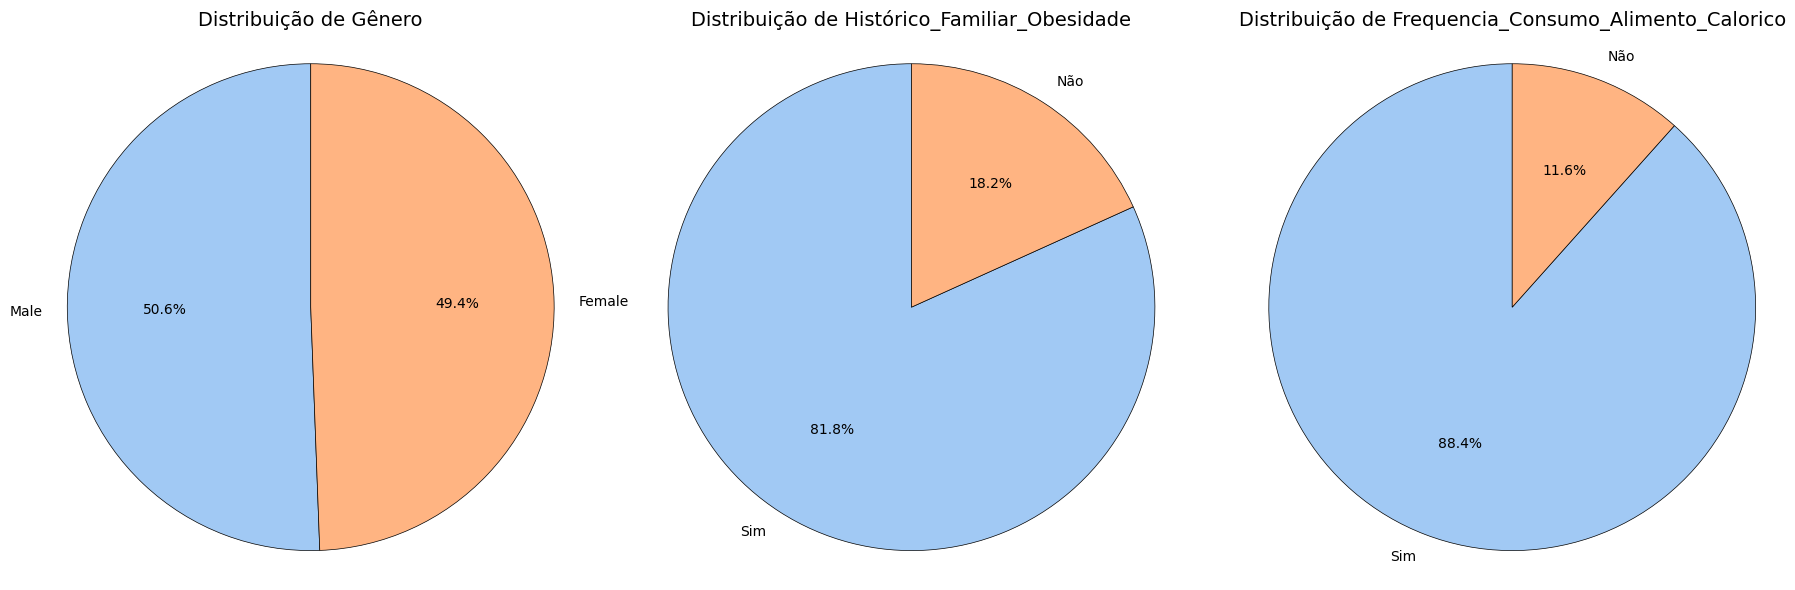

In [56]:

# 4. Geração dos Gráficos de Pizza (Pie Charts)
colunas_pizza = [
    'Gênero',
    'Histórico_Familiar_Obesidade', # Binária (0/1)
    'Frequencia_Consumo_Alimento_Calorico', # Binária (0/1)
]

# Dicionário para mapear 0/1 para rótulos legíveis nos gráficos
mapeamento_rotulos = {
    0: 'Não',
    1: 'Sim'
}

# Usando um layout de 1 linha e 3 colunas para os 3 gráficos
plt.figure(figsize=(18, 6))

for i, col in enumerate(colunas_pizza):
    plt.subplot(1, 3, i + 1)

    # Obter contagens de valores
    contagens = df_obesity[col].value_counts()

    # Mapear 0/1 para Sim/Não para melhor visualização, se for binário
    if col in ['Histórico_Familiar_Obesidade', 'Frequencia_Consumo_Alimento_Calorico']:
        labels = contagens.index.map(mapeamento_rotulos)
    else:
        labels = contagens.index
    
    # Gerar o gráfico de pizza
    plt.pie(
        contagens.values,
        labels=labels,
        autopct='%1.1f%%', # Formata a porcentagem (1 casa decimal)
        startangle=90,
        colors=sns.color_palette("pastel", len(contagens.index)),
        wedgeprops={"edgecolor":"black",'linewidth': 0.5}
    )
    
    plt.title(f'Distribuição de {col}', fontsize=14)
    # Garante que o gráfico de pizza seja circular
    plt.axis('equal') 

plt.tight_layout()
plt.show()